In [ ]:
import pandas as pd
import numpy as np
import missingno as msno #визуализация недостающих данных
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

from sklearn.linear_model import LinearRegression # линейная регрессия
from sklearn.linear_model import Lasso # лассо- регресивный анализ
from sklearn.linear_model import LassoCV # Линейная модель Лассо с итеративной подгонкой по пути регуляризации.
from sklearn.linear_model import Ridge #один из методов понижения размерности, применяется для борьбы с избыточностью данных

from sklearn.preprocessing import MinMaxScaler # нормализация данных от 0 до 1
from sklearn.preprocessing import StandardScaler #предварительной обработки перед многими моделями машинного обучения, чтобы стандартизировать диапазон функциональных возможностей входного набора данных
from sklearn.model_selection import train_test_split # для разделения датасета перед обучением
from sklearn.model_selection import GridSearchCV # Поиск по решетке
from sklearn.model_selection import cross_val_score # оценка кросс-валидации
from sklearn.model_selection import cross_validate # кросс-валидация

# Подготавливаем данные

In [ ]:
from sklearn import datasets
data = datasets.load_breast_cancer()
#print(data.DESCR)

In [ ]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# Информация о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
x = data.data
#удаляем среднее значение и масштабирует данные до единичной дисперсии
scaler = StandardScaler()
#scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)
y = data.target
#print(x)
#Для валидации разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(x, y)

# Линейная регрессия

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.17092711407718722
Mean Squared Error: 0.04355819092538171
R2 Score: 0.8117663892153147


In [ ]:
LinearModel=LinearRegression()
parameters = {'positive':[False,True]}
scoring_param = {'r2','neg_mean_absolute_error','neg_mean_squared_error'}
gscv = GridSearchCV(LinearModel, parameters,scoring=scoring_param,refit='r2', return_train_score=True)
gscv.fit(x,y)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'positive': [False, True]}, refit='r2',
             return_train_score=True,
             scoring={'neg_mean_absolute_error', 'neg_mean_squared_error',
                      'r2'})

In [ ]:
print('best parameters:', gscv.best_params_)
print('best score:', gscv.best_score_)

best parameters: {'positive': False}
best score: 0.7046861734644289


In [ ]:
CVLM=gscv.best_estimator_
CVLM.fit(X_train,y_train)
y_pred=CVLM.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 Score:', metrics.r2_score(y_test, y_pred))
lr_mae=metrics.mean_absolute_error(y_test, y_pred)
lr_mse=metrics.mean_squared_error(y_test, y_pred)
lr_r2=metrics.r2_score(y_test, y_pred)

Mean Absolute Error: 0.17092711407718722
Mean Squared Error: 0.04355819092538171
R2 Score: 0.8117663892153147


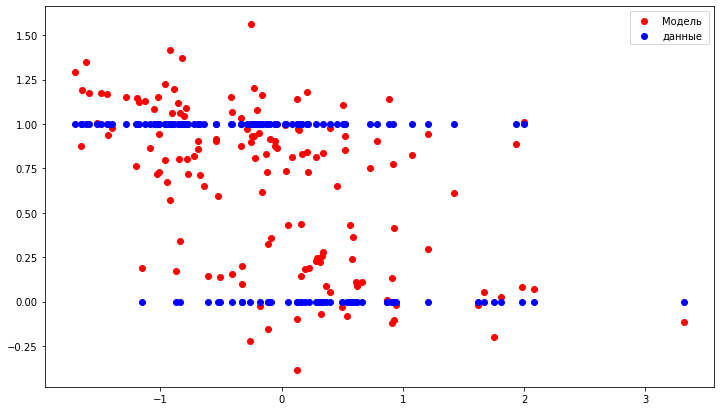

In [ ]:
param_num=1
x_reg = X_test[:,param_num]
y_reg = y_pred

fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(x_reg,y_reg,color='red',
        label='Модель ')
ax.scatter(X_test[:,param_num],y_test,
           color='blue', label='данные')
ax.legend()
plt.show()

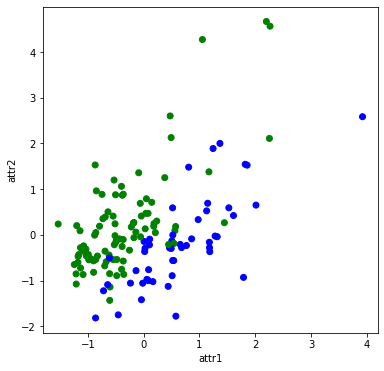

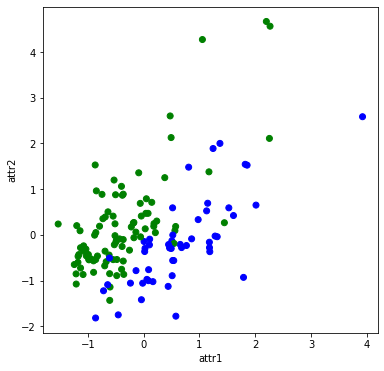

In [ ]:
x_reg = np.linspace(0, 1, 143)
y_reg =np.around(y_pred)

atr_1=5
atr_2=9
fig, ax = plt.subplots(figsize=(6,6))
fig,ay= plt.subplots(figsize=(6,6))

ax.scatter(X_test[:, atr_1], X_test[:, atr_2],
c=np.where(y_reg,'green','blue'))
ax.set_xlabel('attr1')
ax.set_ylabel('attr2')
ay.scatter(X_test[:, atr_1], X_test[:, atr_2],
c=np.where(y_test,'green','blue'))
ay.set_xlabel('attr1')
ay.set_ylabel('attr2')
plt.show()

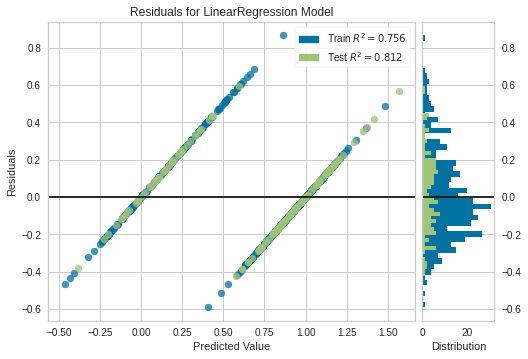

In [ ]:
from yellowbrick.regressor import residuals_plot
viz = residuals_plot(regressor, X_train, y_train, X_test, y_test)

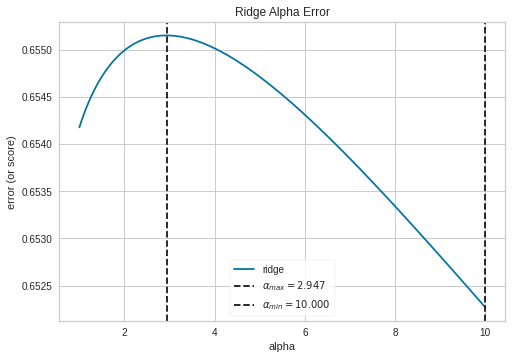

In [ ]:
from yellowbrick.regressor.alphas import alphas
from yellowbrick.regressor import ManualAlphaSelection
alphas = np.logspace(0, 1, 50)

# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(),
    alphas=alphas,
    cv=12,
    scoring="r2"
)

visualizer.fit(x, y)
visualizer.show()

#   Лассо


In [ ]:
LassoModel = LassoCV(max_iter=4000)
LassoModel.fit(X_train, y_train)
y_pred=LassoModel.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.16928582546457535
Mean Squared Error: 0.041876807191851634
R2 Score: 0.8190323689209269


In [ ]:
LassoModel.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': None,
 'eps': 0.001,
 'fit_intercept': True,
 'max_iter': 4000,
 'n_alphas': 100,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': False}

In [ ]:
LassoModel=Lasso()
parameters = {'alpha': [0.01,0.05,0.1, 0.5, 1., 1.5,5,10,100],
              'positive':[False,True],
              'selection':['cyclic', 'random'],
              'tol':[1e-5,1e-4,1e-3]}
scoring_param = {'r2','neg_mean_absolute_error','neg_mean_squared_error'}
gscv = GridSearchCV(LassoModel, parameters,scoring=scoring_param,refit='r2', return_train_score=True)
gscv.fit(x,y)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.05, 0.1, 0.5, 1.0, 1.5, 5, 10, 100],
                         'positive': [False, True],
                         'selection': ['cyclic', 'random'],
                         'tol': [1e-05, 0.0001, 0.001]},
             refit='r2', return_train_score=True,
             scoring={'neg_mean_absolute_error', 'neg_mean_squared_error',
                      'r2'})

In [ ]:
LassoModel.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [ ]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [ ]:
print('best parameters:', gscv.best_params_)
print('best score:', gscv.best_score_)

best parameters: {'alpha': 0.01, 'positive': False, 'selection': 'random', 'tol': 0.001}
best score: 0.6721996512889976


In [ ]:
CVLaM=gscv.best_estimator_
CVLaM.fit(X_train,y_train)
y_pred=CVLaM.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 Score:', metrics.r2_score(y_test, y_pred))
la_mae=metrics.mean_absolute_error(y_test, y_pred)
la_mse=metrics.mean_squared_error(y_test, y_pred)
la_r2=metrics.r2_score(y_test, y_pred)

Mean Absolute Error: 0.18663156441869103
Mean Squared Error: 0.05350094172607804
R2 Score: 0.7687995018265913


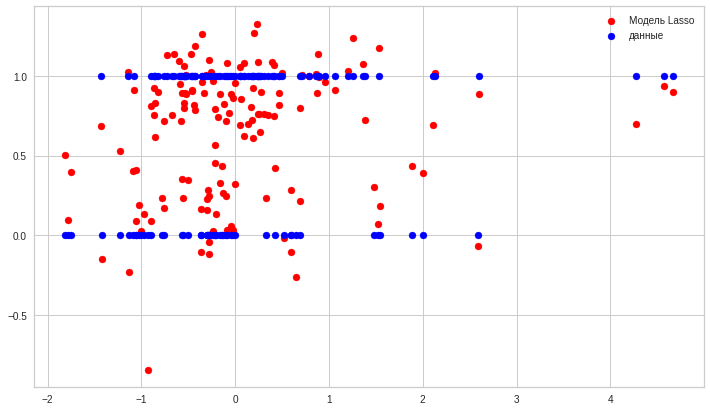

In [ ]:
param_num=9
x_reg = X_test[:,param_num]
y_reg = y_pred

fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(x_reg,y_reg,color='red',
        label='Модель Lasso')
ax.scatter(X_test[:,param_num],y_test,
           color='blue', label='данные')
ax.legend()
plt.show()

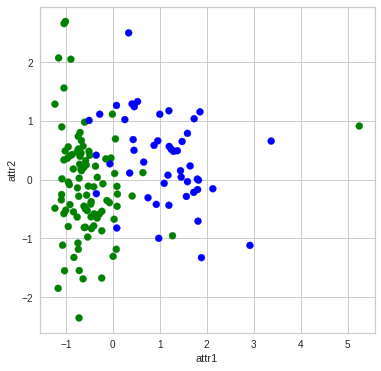

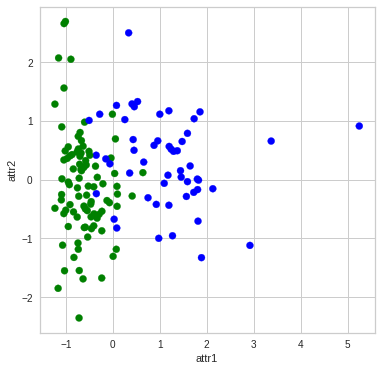

In [ ]:
x_reg = np.linspace(0, 1, 143)
y_reg =np.around(y_pred)

atr_1=3
atr_2=8
fig, ax = plt.subplots(figsize=(6,6))
fig,ay= plt.subplots(figsize=(6,6))

ax.scatter(X_test[:, atr_1], X_test[:, atr_2],
c=np.where(y_reg,'green','blue'))
ax.set_xlabel('attr1')
ax.set_ylabel('attr2')
ay.scatter(X_test[:, atr_1], X_test[:, atr_2],
c=np.where(y_test,'green','blue'))
ay.set_xlabel('attr1')
ay.set_ylabel('attr2')
plt.show()

# Гребневая регрессия

In [ ]:
RidgeModel = Ridge(alpha=1.0)
RidgeModel.fit(X_train, y_train)
y_pred=RidgeModel.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 Score:', metrics.r2_score(y_test, y_pred))


Mean Absolute Error: 0.17199706825768632
Mean Squared Error: 0.043433681377701
R2 Score: 0.8123044483320778


In [ ]:
RidgeModel=Ridge()
parameters = {'alpha': [0.01,0.05,0.1, 0.5, 1., 1.5,5,10,100],
              'positive':[False,True],
              'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
              'tol':[1e-5,1e-4,1e-3]}
scoring_param = {'r2','neg_mean_absolute_error','neg_mean_squared_error'}
gscv = GridSearchCV(RidgeModel, parameters,scoring=scoring_param,refit='r2', return_train_score=True)
gscv.fit(x,y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means 

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.05, 0.1, 0.5, 1.0, 1.5, 5, 10, 100],
                         'positive': [False, True],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs'],
                         'tol': [1e-05, 0.0001, 0.001]},
             refit='r2', return_train_score=True,
             scoring={'neg_mean_absolute_error', 'neg_mean_squared_error',
                      'r2'})

In [ ]:
RidgeModel.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'random_state', 'solver', 'tol'])

In [ ]:
print('best parameters:', gscv.best_params_)
print('best score:', gscv.best_score_)

best parameters: {'alpha': 0.5, 'positive': False, 'solver': 'sparse_cg', 'tol': 0.001}
best score: 0.7097695556228236


In [ ]:
CVRM=gscv.best_estimator_
CVRM.fit(X_train,y_train)
y_pred=CVRM.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 Score:', metrics.r2_score(y_test, y_pred))
rm_mae=metrics.mean_absolute_error(y_test, y_pred)
rm_mse=metrics.mean_squared_error(y_test, y_pred)
rm_r2=metrics.r2_score(y_test, y_pred)

Mean Absolute Error: 0.17233336140722058
Mean Squared Error: 0.043977853487697185
R2 Score: 0.8099528474281658


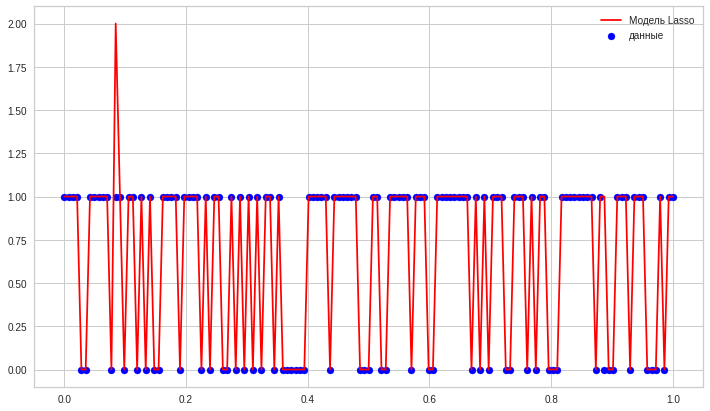

In [ ]:

x_reg = np.linspace(0, 1, 143)
y_reg =np.around(y_pred)

fig, ax = plt.subplots(figsize=(12,7))
ax.plot(x_reg,y_reg,color='red',
        label='Модель Lasso')
ax.scatter(np.linspace(0, 1, 143),y_test,
           color='blue', label='данные')
ax.legend()
plt.show()

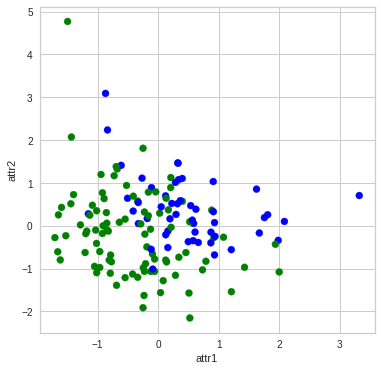

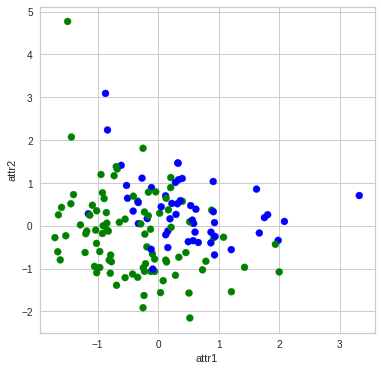

In [ ]:
atr_1=1
atr_2=4
fig, ax = plt.subplots(figsize=(6,6))
fig,ay= plt.subplots(figsize=(6,6))

ax.scatter(X_test[:, atr_1], X_test[:, atr_2],
c=np.where(y_reg,'green','blue'))
ax.set_xlabel('attr1')
ax.set_ylabel('attr2')
ay.scatter(X_test[:, atr_1], X_test[:, atr_2],
c=np.where(y_test,'green','blue'))
ay.set_xlabel('attr1')
ay.set_ylabel('attr2')
plt.show()

# Ансамбль методов

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor

In [ ]:
LinearRegressionModel = LinearRegression()
LinearRegressionModel.fit(X_train, y_train)
LRM_score=LinearRegressionModel.score(X_test,y_test)
LRM_score

0.8117663892153147

In [ ]:
LassoModel = LassoCV()
LassoModel.fit(X_train, y_train)
LaM_score=LassoModel.score(X_test,y_test)
LaM_score

0.8190323689209269

In [ ]:
RidgeModel = Ridge(alpha=1.0)
RidgeModel.fit(X_train, y_train)
RM_score=RidgeModel.score(X_test,y_test)
RM_score

0.8123044483320778

In [ ]:
print('LinearRegression: {}'.format(LRM_score))
print('Lasso: {}'.format(LaM_score))
print('Ridge: {}'.format(RM_score))

LinearRegression: 0.8117663892153147
Lasso: 0.8190323689209269
Ridge: 0.8123044483320778


In [ ]:
model_mean = np.mean([LRM_score, LaM_score, RM_score])
print('model mean: {}'.format(model_mean))

model mean: 0.8143677354894399


## Bagging

In [ ]:
LM_bg=BaggingRegressor(base_estimator=LinearRegression(), n_estimators=15, max_samples=0.75)
LM_bg.fit(X_train, y_train)
LM_bg_score=LM_bg.score(X_test,y_test)
print("LM score =", LRM_score)
print("Bagging LM =", LM_bg_score)

LM score = 0.8117663892153147
Bagging LM = 0.8156015186300561


In [ ]:
LaM_bg=BaggingRegressor(base_estimator=LassoCV(max_iter=5000), n_estimators=15, max_samples=0.75)
LaM_bg.fit(X_train, y_train)
LaM_bg_score=LM_bg.score(X_test,y_test)
print("LaM score =", LaM_score)
print("Bagging LaM =", LaM_bg_score)

LaM score = 0.8190323689209269
Bagging LaM = 0.8156015186300561


In [ ]:
RM_bg=BaggingRegressor(base_estimator=Ridge(), n_estimators=15, max_samples=0.75)
RM_bg.fit(X_train, y_train)
RM_bg_score=RM_bg.score(X_test,y_test)
print("RM score =", RM_score)
print("Bagging RM =", RM_bg_score)

RM score = 0.8123044483320778
Bagging RM = 0.8033994991028636


In [ ]:
print('Bagging LM: {}'.format(LM_bg_score))
print('Bagging LaM: {}'.format(LaM_bg_score))
print('Bagging RM: {}'.format(RM_bg_score))

Bagging LM: 0.8156015186300561
Bagging LaM: 0.8156015186300561
Bagging RM: 0.8033994991028636


In [ ]:
model_bg_mean = np.mean([LM_bg_score, LM_bg_score, RM_bg_score])
print('bagging model mean: {}'.format(model_bg_mean))

bagging model mean: 0.8115341787876585


## Voting

In [ ]:
# список моделей - пары (имя, ссылка)
estimators=[('Bagging LM', LM_bg), ('Bagging LaM', LaM_bg), ('Bagging RM', RM_bg)]
# создадим ансамбль
ensemble = VotingRegressor(estimators)
# обучим ансамбль на обучающей выборке
ensemble.fit(X_train, y_train)
# оценка на тестовой выборке
print('model mean: {}'.format(model_mean))
print('voting : {}'.format(ensemble.score(X_test, y_test)))
vote_score=ensemble.score(X_test, y_test)

model mean: 0.8143677354894399
voting : 0.8188444814332622


## Stacking

In [ ]:
estimators = [('Bagging LM', LM_bg), ('Bagging LaM', LaM_bg), ('Bagging RM', RM_bg)]
meta_clf_bg = StackingRegressor(estimators=estimators)
meta_clf_bg.fit(X_train, y_train)
print('bagging model mean: {}'.format(model_bg_mean))
print('voting: {}'.format(ensemble.score(X_test, y_test)))
print('stacking: {}'.format(meta_clf_bg.score(X_test, y_test)))
stack_score=meta_clf_bg.score(X_test, y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007278953172297875, tolerance: 0.006763593099345627
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008933170396076662, tolerance: 0.0060982603878116355
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007966286830569658, tolerance: 0.006530490793250719
  model = cd_fast.enet_coordinate_descent_gram(


bagging model mean: 0.8115341787876585
voting: 0.8188444814332622
stacking: 0.8138990544894618


In [ ]:
y_pred=meta_clf_bg.predict(X_test)

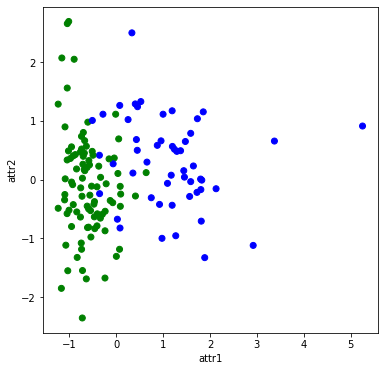

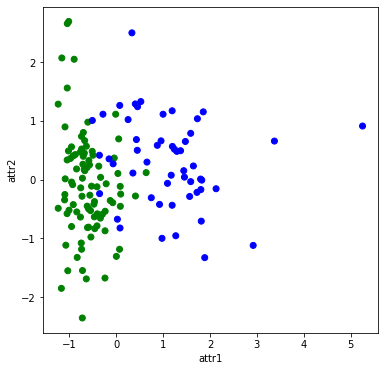

In [ ]:
y_reg =np.around(y_pred)

atr_1=3
atr_2=8
fig, ax = plt.subplots(figsize=(6,6))
fig,ay= plt.subplots(figsize=(6,6))

ax.scatter(X_test[:, atr_1], X_test[:, atr_2],
c=np.where(y_reg,'green','blue'))
ax.set_xlabel('attr1')
ax.set_ylabel('attr2')
ay.scatter(X_test[:, atr_1], X_test[:, atr_2],
c=np.where(y_test,'green','blue'))
ay.set_xlabel('attr1')
ay.set_ylabel('attr2')
plt.show()

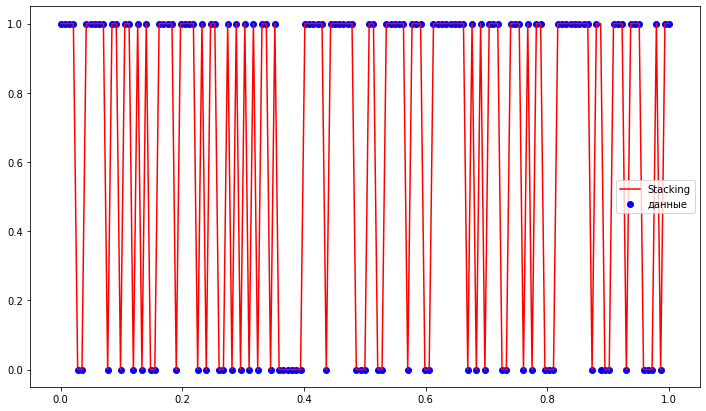

In [ ]:
x_reg = np.linspace(0, 1, 143)
y_reg =np.around(y_pred)

fig, ax = plt.subplots(figsize=(12,7))
ax.plot(x_reg,y_reg,color='red',
        label='Stacking')
ax.scatter(np.linspace(0, 1, 143),y_test,
           color='blue', label='данные')
ax.legend()
plt.show()

# Нейронка

In [ ]:
import tensorflow #открытая  библиотека для машинного обучения для тренировки нейронной сети
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae','mse'])

In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    validation_split=0.1,
                    verbose=2)

Epoch 1/100
12/12 - 1s - loss: 0.1079 - mae: 0.2933 - mse: 0.1079 - val_loss: 0.0847 - val_mae: 0.2331 - val_mse: 0.0847 - 1s/epoch - 93ms/step
Epoch 2/100
12/12 - 0s - loss: 0.0537 - mae: 0.1743 - mse: 0.0537 - val_loss: 0.0623 - val_mae: 0.1744 - val_mse: 0.0623 - 41ms/epoch - 3ms/step
Epoch 3/100
12/12 - 0s - loss: 0.0386 - mae: 0.1290 - mse: 0.0386 - val_loss: 0.0480 - val_mae: 0.1380 - val_mse: 0.0480 - 45ms/epoch - 4ms/step
Epoch 4/100
12/12 - 0s - loss: 0.0307 - mae: 0.1004 - mse: 0.0307 - val_loss: 0.0371 - val_mae: 0.1128 - val_mse: 0.0371 - 44ms/epoch - 4ms/step
Epoch 5/100
12/12 - 0s - loss: 0.0257 - mae: 0.0815 - mse: 0.0257 - val_loss: 0.0311 - val_mae: 0.0989 - val_mse: 0.0311 - 51ms/epoch - 4ms/step
Epoch 6/100
12/12 - 0s - loss: 0.0222 - mae: 0.0709 - mse: 0.0222 - val_loss: 0.0289 - val_mae: 0.0837 - val_mse: 0.0289 - 44ms/epoch - 4ms/step
Epoch 7/100
12/12 - 0s - loss: 0.0200 - mae: 0.0601 - mse: 0.0200 - val_loss: 0.0275 - val_mae: 0.0748 - val_mse: 0.0275 - 48ms/epo

In [ ]:
pred = model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('R2 Score:', metrics.r2_score(y_test, pred))

Mean Absolute Error: 0.00865731697394609
Mean Squared Error: 0.0051121797978213165
R2 Score: 0.977908080159415


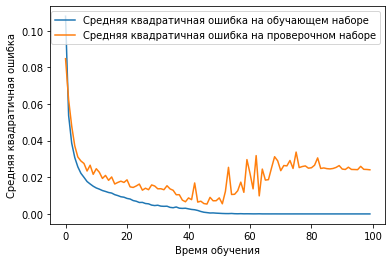

In [ ]:
plt.plot(history.history['mse'],
         label='Средняя квадратичная ошибка на обучающем наборе')
plt.plot(history.history['val_mse'],
         label='Средняя квадратичная ошибка на проверочном наборе')
plt.xlabel('Время обучения')
plt.ylabel('Средняя квадратичная ошибка')
plt.legend()
plt.show()

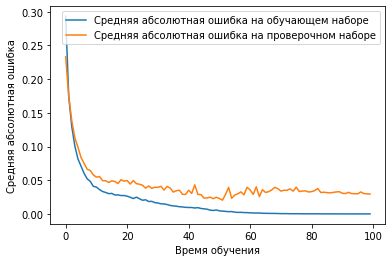

In [ ]:
plt.plot(history.history['mae'],
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'],
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Время обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

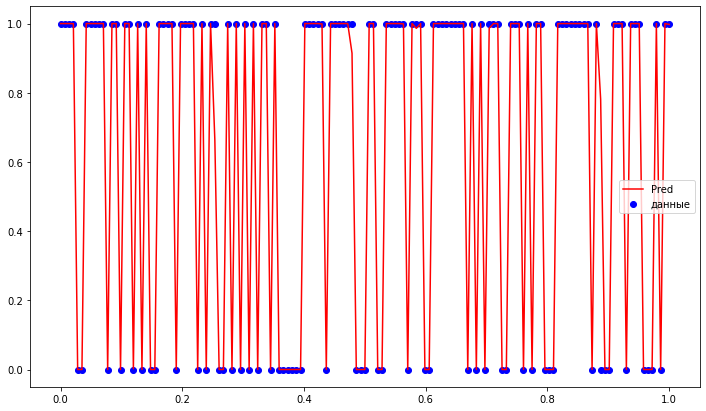

In [ ]:
x_reg = np.linspace(0, 1, 143)
y_reg =pred

fig, ax = plt.subplots(figsize=(12,7))
ax.plot(x_reg,y_reg,color='red',
        label='Pred')
ax.scatter(np.linspace(0, 1, 143),y_test,
           color='blue', label='данные')
ax.legend()
plt.show()

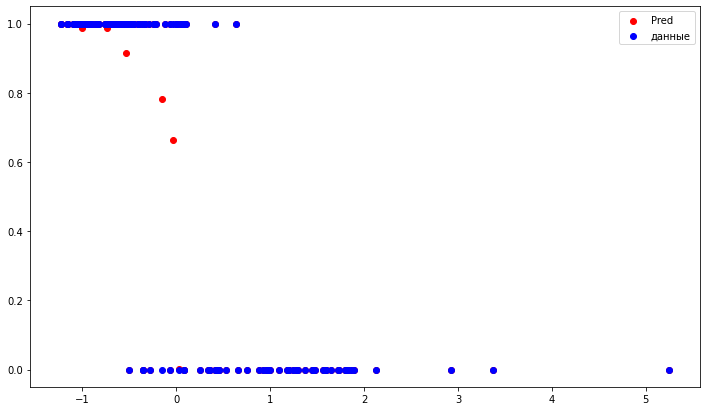

In [ ]:
param_num=3
x_reg = X_test[:,param_num]
y_reg = pred

fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(x_reg,y_reg,color='red',
        label='Pred')
ax.scatter(X_test[:,param_num],y_test,
           color='blue', label='данные')
ax.legend()
plt.show()

In [ ]:
!git clone https://github.com/keras-team/keras-tuner.git

Cloning into 'keras-tuner'...
remote: Enumerating objects: 8176, done.
remote: Counting objects: 100% (1177/1177), done.
remote: Compressing objects: 100% (381/381), done.
remote: Total 8176 (delta 951), reused 887 (delta 794), pack-reused 6999
Receiving objects: 100% (8176/8176), 1.89 MiB | 15.32 MiB/s, done.
Resolving deltas: 100% (5769/5769), done.


In [ ]:
%cd keras-tuner
!pip install .

/content/keras-tuner
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/keras-tuner
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 1.6 MB 4.6 MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.2.0.dev0-py3-none-any.whl size=164358 sha256=c7f6d4adba4fd412564b3ec645d11e67832c7a56b55d73fa595821a87dd8b076
  Stored in directory: /root/.cache/pip/wheels/0d/35/ac/b2dfe128d064d7929843919cdf52e3dffd1ee67dbc84085509
Successfully built keras-tuner


In [ ]:
from kerastuner import RandomSearch,Hyperband,BayesianOptimization
def build_model(hp):
    model=Sequential()
    hp_units1 = hp.Int('units1', min_value=5, max_value=1024, step=16)
    hp_units2 = hp.Int('units2', min_value=5, max_value=1024, step=16)
    activation_choice1=hp.Choice('activation1',values=['relu','sigmoid','tanh','elu','selu'])
    activation_choice2=hp.Choice('activation2',values=['relu','sigmoid','tanh','elu','selu'])
    model.add(Dense(units=hp_units1,input_dim=X_train.shape[1],activation=activation_choice1))
    model.add(Dense(units=hp_units2,activation=activation_choice2))
    model.add(Dense(1))
    model.compile(
        optimizer=hp.Choice('optimizer',values=['adam','rmsprop','SGD']),
        loss='MeanSquaredError',
        metrics=['MeanSquaredError'])
    return model

<ipython-input-38-86b093626de3>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch,Hyperband,BayesianOptimization


In [ ]:
tuner=BayesianOptimization(
    build_model,
    objective='loss',

    max_trials=30,
    directory='test_directory',
    overwrite=True,
)

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 5
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 1024, 'step': 16, 'sampling': 'linear'}
units2 (Int)
{'default': None, 'conditions': [], 'min_value': 5, 'max_value': 1024, 'step': 16, 'sampling': 'linear'}
activation1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh', 'elu', 'selu'], 'ordered': False}
activation2 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh', 'elu', 'selu'], 'ordered': False}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'rmsprop', 'SGD'], 'ordered': False}


In [ ]:
tuner.search(X_train,y_train,batch_size=40,epochs=50,validation_split=0.2,verbose=1)

Trial 30 Complete [00h 00m 21s]
loss: 0.0036530341021716595

Best loss So Far: 0.0017288046656176448
Total elapsed time: 00h 08m 13s


In [ ]:
models=tuner.get_best_models(num_models=3)
for model in models:
  model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1013)              31403     
                                                                 
 dense_1 (Dense)             (None, 1013)              1027182   
                                                                 
 dense_2 (Dense)             (None, 1)                 1014      
                                                                 
Total params: 1,059,599
Trainable params: 1,059,599
Non-trainable params: 0
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1013)              31403     
                                                                 
 dense_1 (Dense)          

In [ ]:
model = Sequential()
model.add(Dense(229, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(677, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae','mse'])

In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    validation_split=0.1,
                    verbose=2)

Epoch 1/100
12/12 - 1s - loss: 0.3111 - mae: 0.4102 - mse: 0.3111 - val_loss: 0.5104 - val_mae: 0.5179 - val_mse: 0.5104 - 1s/epoch - 84ms/step
Epoch 2/100
12/12 - 0s - loss: 0.1934 - mae: 0.3215 - mse: 0.1934 - val_loss: 0.5234 - val_mae: 0.4645 - val_mse: 0.5234 - 232ms/epoch - 19ms/step
Epoch 3/100
12/12 - 0s - loss: 0.1712 - mae: 0.2893 - mse: 0.1712 - val_loss: 0.2164 - val_mae: 0.3867 - val_mse: 0.2164 - 262ms/epoch - 22ms/step
Epoch 4/100
12/12 - 0s - loss: 0.1015 - mae: 0.2427 - mse: 0.1015 - val_loss: 0.1547 - val_mae: 0.3004 - val_mse: 0.1547 - 235ms/epoch - 20ms/step
Epoch 5/100
12/12 - 0s - loss: 0.0640 - mae: 0.1896 - mse: 0.0640 - val_loss: 0.1111 - val_mae: 0.2699 - val_mse: 0.1111 - 224ms/epoch - 19ms/step
Epoch 6/100
12/12 - 0s - loss: 0.0395 - mae: 0.1502 - mse: 0.0395 - val_loss: 0.0856 - val_mae: 0.2342 - val_mse: 0.0856 - 229ms/epoch - 19ms/step
Epoch 7/100
12/12 - 0s - loss: 0.0365 - mae: 0.1491 - mse: 0.0365 - val_loss: 0.0772 - val_mae: 0.2291 - val_mse: 0.0772 

In [ ]:
pred = model.predict(X_test)

5/5 [==============================] - 0s 5ms/step


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('R2 Score:', metrics.r2_score(y_test, pred))

Mean Absolute Error: 0.11857338433342797
Mean Squared Error: 0.02527649748579056
R2 Score: 0.8907694215792622


# Графики сравнения моделей

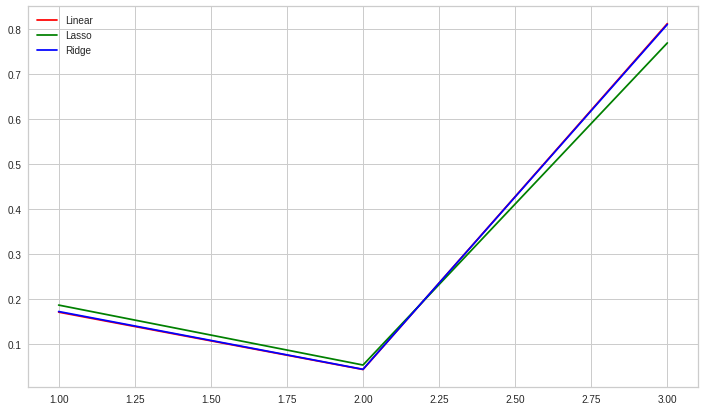

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
ax.plot([1,2,3],[lr_mae,lr_mse,lr_r2],color='red',
        label='Linear')
ax.plot([1,2,3],[la_mae,la_mse,la_r2],color='green',
        label='Lasso')
ax.plot([1,2,3],[rm_mae,rm_mse,rm_r2],color='blue',
        label='Ridge')
ax.legend()
plt.show()

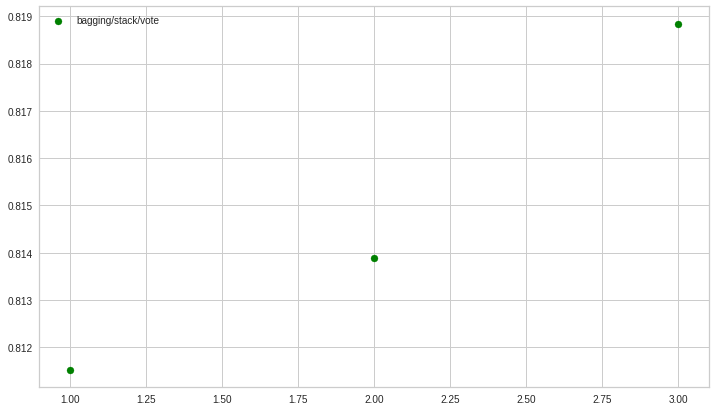

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
ax.scatter([1,2,3],[model_bg_mean,stack_score,vote_score],color='green', label='bagging/stack/vote')

ax.legend()
plt.show()